In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

One two attack

In [ ]:
def onetwo_attack(q, n):
    
    # q = hashrate de l'attaquant 
    # n = nombre d'attaques

    R = [] # Blocks miné par l'attaquant


    H= [] #Blocks minés par la blockchain officielle

    for i in range(n):

        r = 0 #nb de blocks miné par l'attaquant lors de cette attaque

        h = 0 #nb de blocks minés par la blockchain officielles lors de cette attaque

        for j in range(3):
            result = random.uniform(0,1) #on génère un nombre random 
            if(j == 0):
                if result > q: # le nb généré est supérieur à la puissance de l'attaquant, l'attaque est terminée
                    h = 1
                   
                    break     
                if result < q:
                    r = r+1
                
            else: #le nb généré est inférieur à la puissance de l'attaquant, l'attaque continue. 
                if result < q:
                    r = r+1
                   
            if( j == 2):
                if(r == 3): # l'attaquant ajoute 3 blocks à la blockchain officielle
                    h = 3

                if(r == 2):# l'attaquant ajoute 2 blocks à la blockchain officielle
                    h = 2
                if(r == 1):#l'attaquant est en retard sur la blockchain officielle et n'ajoute donc aucun block
                    h = 2
                    r = 0         

  
        H.append(h)        
        R.append(r)
        ER = 0
        EH = 0
        for i in range(len(H)):
            ER = ER + (R[i])
            EH = EH + (H[i])
    finale = ER/EH # calcul du rendement
    return finale,

Le rendement est positif à partir de 0.405


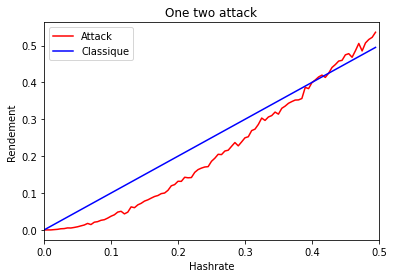

In [ ]:
result=[]
classique=[]
positive_rendement = False

for i in np.arange(0, 0.5, 0.005):
  temp = onetwo_attack(i,10000)
  result.append(temp)
  if temp>i:
    if not positive_rendement : # permet de savoir à partir de quand le rendement est positif
            print("Le rendement est positif à partir de " +str(i))
            positive_rendement = True

x = np.arange(0,0.5,0.005)
y = result


X = np.array(x)
Y = np.array(y)



col = 'red'
col2 = 'blue'

plt.plot(X, Y, label = 'Attack', color=col)
plt.plot(X, X, label = 'Classique', color=col2)
plt.legend() 

plt.title('One two attack')
plt.xlim(0,0.5)          
plt.xlabel('Hashrate')        
plt.ylabel('Rendement')         

plt.show()